<a href="https://colab.research.google.com/github/popcity22/time-series-forex-analysis/blob/main/forex_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


In [2]:
!pip install yfinance


In [3]:
import yfinance as yf

df = yf.download('EURUSD=X', start='2010-01-01')
df = df.reset_index()
df.head()


/tmp/ipython-input-4088332096.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('EURUSD=X', start='2010-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
0,2010-01-01,1.438994,1.440196,1.432706,1.432706,0
1,2010-01-04,1.442398,1.445191,1.426208,1.431004,0
2,2010-01-05,1.436596,1.448310,1.435194,1.442710,0
3,2010-01-06,1.440403,1.443460,1.429123,1.436596,0
4,2010-01-07,1.431803,1.444481,1.430206,1.440300,0


In [7]:
df.to_csv('EURUSD.csv', index=False)


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.isnull().sum()


,,0
Price,Ticker,
Date,,0
Close,EURUSD=X,0
High,EURUSD=X,0
Low,EURUSD=X,0
Open,EURUSD=X,0
Volume,EURUSD=X,0


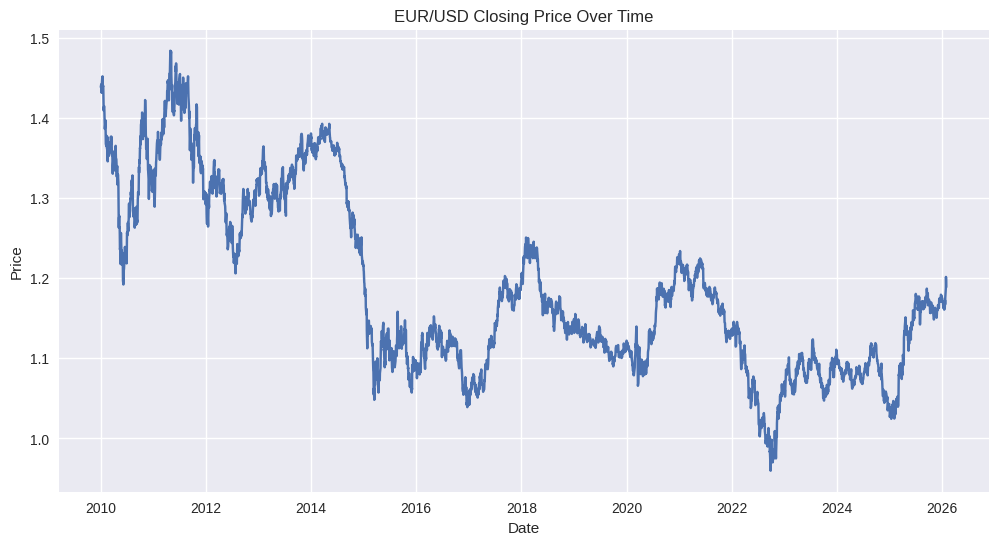

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title('EUR/USD Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


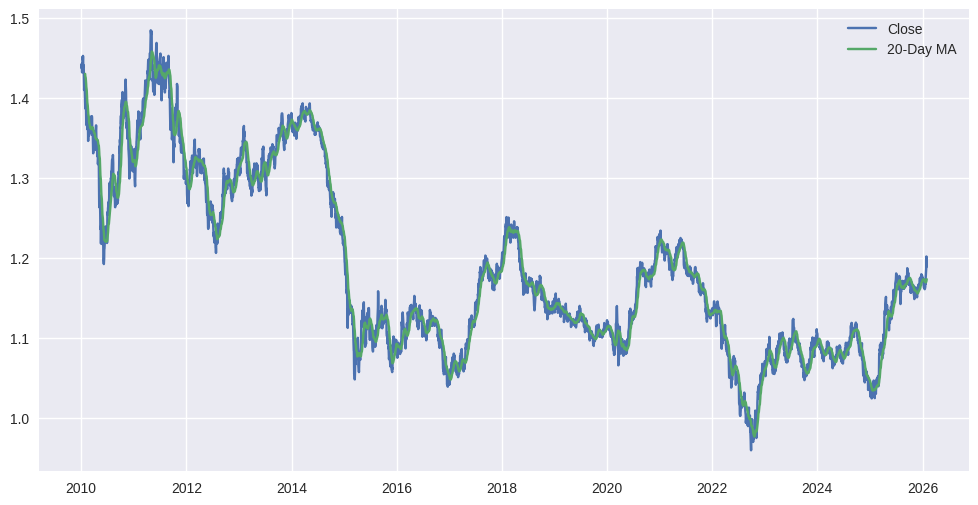

In [10]:
df['MA_20'] = df['Close'].rolling(20).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA_20'], label='20-Day MA')
plt.legend()
plt.show()


In [11]:
from sklearn.linear_model import LinearRegression

df['lag_1'] = df['Close'].shift(1)
df_model = df.dropna()

X = df_model[['lag_1']]
y = df_model['Close']

model = LinearRegression()
model.fit(X, y)

df_model['prediction'] = model.predict(X)


/tmp/ipython-input-761217584.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['prediction'] = model.predict(X)


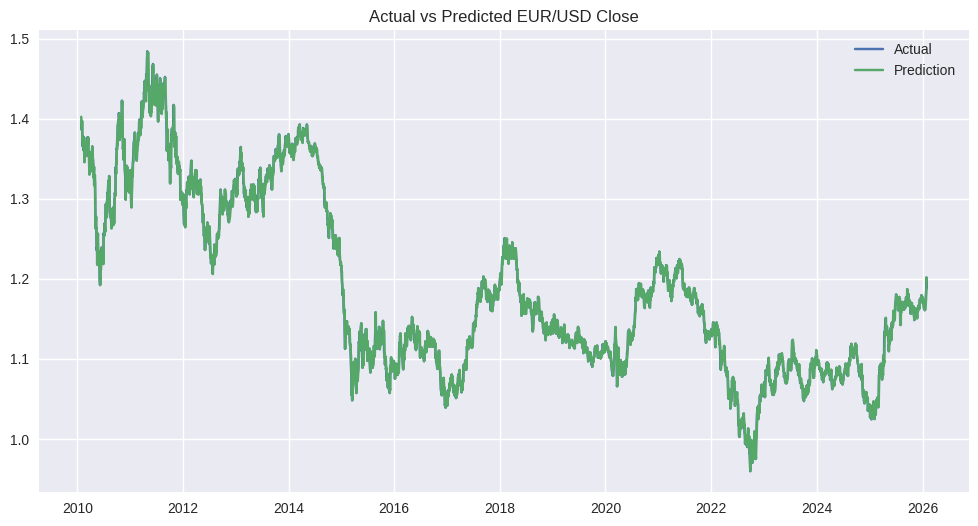

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df_model['Date'], y, label='Actual')
plt.plot(df_model['Date'], df_model['prediction'], label='Prediction')
plt.legend()
plt.title('Actual vs Predicted EUR/USD Close')
plt.show()
